In [1]:
suppressMessages(library(monocle3, quietly=TRUE))
suppressMessages(library(ggplot2))

Warning message:
"程辑包'GenomeInfoDb'是用R版本4.3.2 来建造的"


In [2]:
sce.nest = readRDS('sce.nest.rds')
sce.nest

class: SingleCellExperiment 
dim: 46078 1656 
metadata(0):
assays(2): counts logcounts
rownames(46078): ENSMUSG00000000001 ENSMUSG00000000003 ...
  ENSMUSG00000107391 ENSMUSG00000107392
rowData names(3): GENEID SYMBOL SEQNAME
colnames(1656): HSPC_025 HSPC_031 ... Prog_852 Prog_810
colData names(4): cell.type FACS sizeFactor label
reducedDimNames(3): diffusion PCA TSNE
mainExpName: endogenous
altExpNames(1): ERCC

In [3]:
label <- sce.nest@colData$label
gene_names <- rownames(sce.nest)
cell_names <- colnames(sce.nest)

In [4]:
logcounts <- sce.nest@assays@data$logcounts
X_pca <- sce.nest@int_colData$reducedDims$PCA

In [5]:
pd = data.frame(rownames = colnames(logcounts))
rownames(pd) = colnames(logcounts)

fd = data.frame(gene_short_name = rownames(logcounts))
rownames(fd) = rownames(logcounts)

In [6]:
cds <- new_cell_data_set(logcounts,
                         cell_metadata = pd,
                         gene_metadata = fd)

In [7]:
cds <- preprocess_cds(cds, method = 'PCA',num_dim = 50,norm_method='none')

In [9]:
cds <- reduce_dimension(cds,reduction_method = 'UMAP', preprocess_method ='PCA')

In [10]:
cds <- cluster_cells(cds,cluster_method = 'leiden',resolution=0.005)

In [11]:
cds <- learn_graph(cds,use_partition =FALSE)

  |======================================================================| 100%


In [12]:
cds <- order_cells(cds,root_cells=rownames(pd)[658])

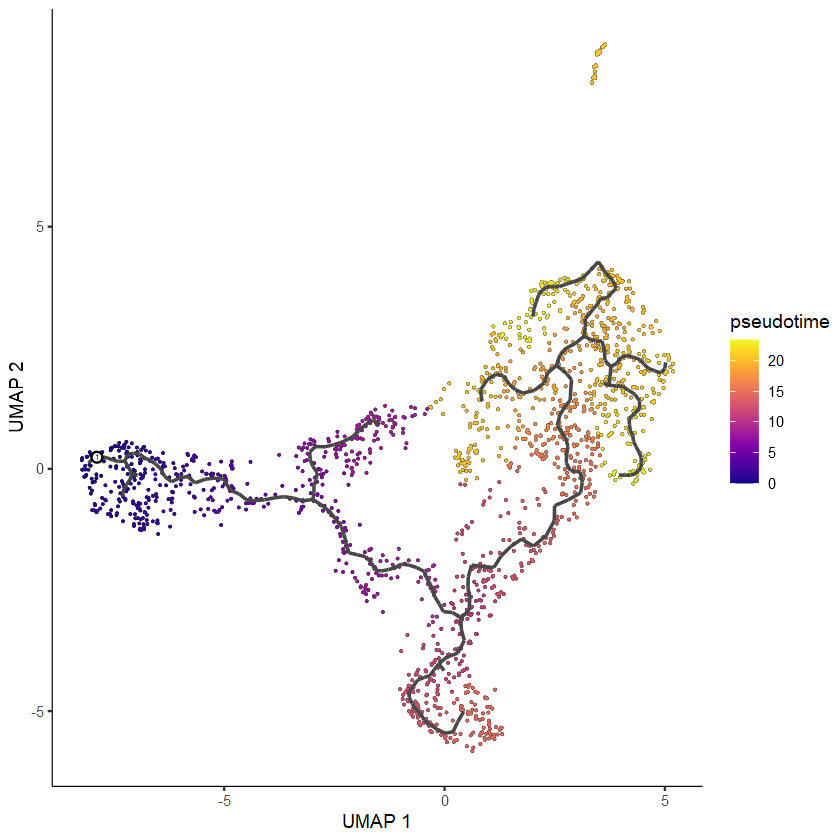

In [13]:
plot_cells(cds,
           color_cells_by = "pseudotime",
           label_cell_groups=FALSE,
           label_leaves=FALSE,
           label_branch_points=FALSE,
           graph_label_size=1.5)

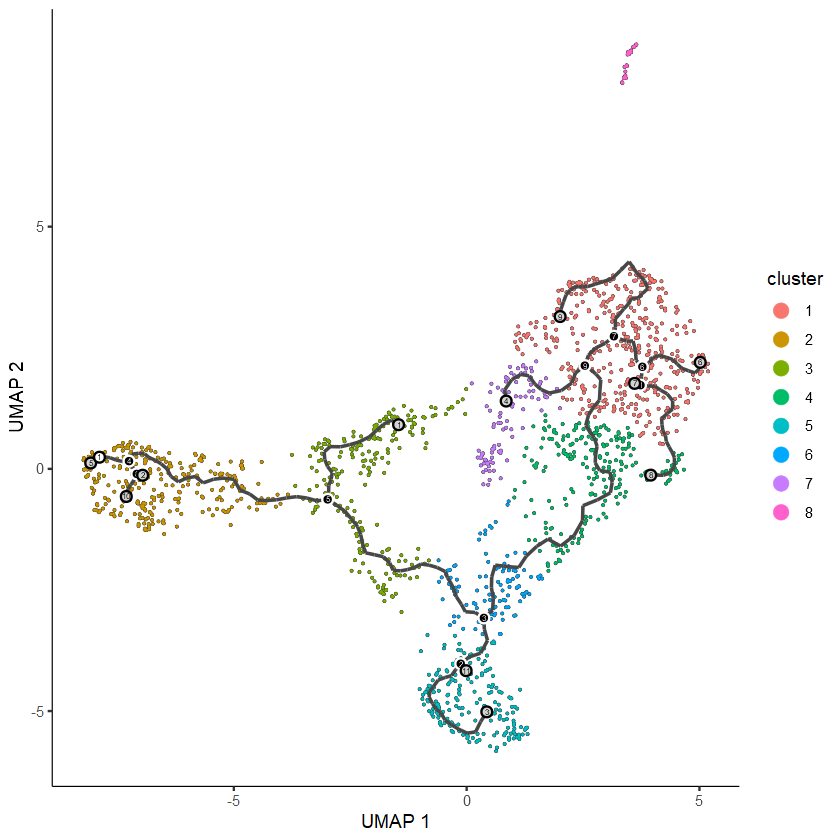

In [14]:
plot_cells(cds,
           color_cells_by = "cluster",
           label_cell_groups=FALSE,
           label_leaves=TRUE,
           label_branch_points=TRUE,
           graph_label_size=1.5)

In [15]:
write.csv(as.array(cds@clusters$UMAP$clusters),'nest.monocle_leiden.csv')
write.csv(pseudotime(cds)/max(pseudotime(cds)),'nest.monocle_pseudotime.csv')